# Emilo Gopaul
## 816007034
### COMP3610 Assignment 4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from string import punctuation
from sklearn import svm
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
import nltk
from nltk import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize
from itertools import chain
import string
import re
from sklearn.metrics import recall_score, f1_score

# Section 1: Text Analysis
## Warm Up

In [3]:
corpus = ['Apple Orange Orange Apple',\
  'Apple Banana Apple Banana',\
  'Banana Apple Banana Banana Banana Apple',\
  'Banana Orange Banana Banana Orange Banana',\
  'Banana Apple Banana Banana Orange Banana']

In [4]:
def word_extraction(sentence):      
    words = re.sub("[^\w]", " ",  sentence).split()   
    cleaned_text = [w.lower() for w in words] 
    return cleaned_text    

In [5]:
def fun1(corpus):
    words = []
    for i in corpus:
        sen = word_extraction(i)
        words.append(sen)   #puts each sentence in its own list, where each list is separated by their words
    
    unique = []

    for i in words:
        for j in i:
            if j not in unique:
                unique.append(j)

    unique.sort() # gets the unique words in the corpus list in sorted order

    word_count = []
    final = []
    for i in words:
        for k in unique:
            l = 0
            for j in i:
                if j == k:
                    l += 1
            word_count.append(l)
        final.append(word_count)
       # final.append('\n')
        word_count = [] 
        
    return final

In [6]:
fun1(corpus)

[[2, 0, 2], [2, 2, 0], [2, 4, 0], [0, 4, 2], [1, 4, 1]]

## Preprocessing and Data Organization
### Task 1.

In [7]:
df = pd.read_csv('MrTrumpSpeeches.csv', sep = "~")
df.head()

id                        playlist  upload_date  \
0  -2WTNSujhjk  Donald Trump Speeches & Events   20160220.0   
1  -64nfy6i58w  Donald Trump Speeches & Events   20161107.0   
2  -7Sp31hTxkU  Donald Trump Speeches & Events   20160423.0   
3  -byuyavcNI4  Donald Trump Speeches & Events   20160617.0   
4  09BXh-AA72M  Donald Trump Speeches & Events   20161105.0   

                                               title  view_count  \
0  Live Stream: Donald Trump Victory Rally in Spa...      4057.0   
1  LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...     47276.0   
2  FULL SPEECH: Donald Trump Rally in Bridgeport,...     19966.0   
3  Full Speech: Donald Trump Rally in Houston,Tex...     15138.0   
4  Full Speech: Donald Trump Rally in Denver,Colo...      8720.0   

  average_rating  like_count  dislike_count  \
0  4.25925922394        44.0           10.0   
1  4.35802459717       952.0          182.0   
2  4.66666650772       220.0           20.0   
3  4.58249139786       266.0           31.0   
4  4.92473125458       365.0            7.0   

  subtitles,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,  
0     presidents of the United States mr. go   tr...                      
1     it's now officially Tuesday November a   di...                      
2     you   [Music]   [Music]   [Music]   you   I...                      
3     we welcome stars and president   [Music]   ...                      
4     you   thank you   [Music]   great people Gr...

In [8]:
df1 = df

In [9]:
df.shape

(836, 9)

In [10]:
ratio = df['like_count']/df['dislike_count']
ratio.describe()

count    797.000000
mean            inf
std             NaN
min        0.095238
25%        4.266667
50%        8.580645
75%       17.000000
max             inf
dtype: float64

In [11]:
sentiment = []

for i in ratio:
    if i > 8.5:
        sentiment.append(1)
    else:
        sentiment.append(0)
        
df["Sentiment"] = sentiment

df.head()
        
        

id                        playlist  upload_date  \
0  -2WTNSujhjk  Donald Trump Speeches & Events   20160220.0   
1  -64nfy6i58w  Donald Trump Speeches & Events   20161107.0   
2  -7Sp31hTxkU  Donald Trump Speeches & Events   20160423.0   
3  -byuyavcNI4  Donald Trump Speeches & Events   20160617.0   
4  09BXh-AA72M  Donald Trump Speeches & Events   20161105.0   

                                               title  view_count  \
0  Live Stream: Donald Trump Victory Rally in Spa...      4057.0   
1  LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...     47276.0   
2  FULL SPEECH: Donald Trump Rally in Bridgeport,...     19966.0   
3  Full Speech: Donald Trump Rally in Houston,Tex...     15138.0   
4  Full Speech: Donald Trump Rally in Denver,Colo...      8720.0   

  average_rating  like_count  dislike_count  \
0  4.25925922394        44.0           10.0   
1  4.35802459717       952.0          182.0   
2  4.66666650772       220.0           20.0   
3  4.58249139786       266.0           31.0   
4  4.92473125458       365.0            7.0   

  subtitles,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,  \
0     presidents of the United States mr. go   tr...                       
1     it's now officially Tuesday November a   di...                       
2     you   [Music]   [Music]   [Music]   you   I...                       
3     we welcome stars and president   [Music]   ...                       
4     you   thank you   [Music]   great people Gr...                       

   Sentiment  
0          0  
1          0  
2          1  
3          1  
4          1

### Task 2.

In [12]:
X = df['subtitles,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,']
X.head()

0       presidents of the United States mr. go   tr...
1       it's now officially Tuesday November a   di...
2       you   [Music]   [Music]   [Music]   you   I...
3       we welcome stars and president   [Music]   ...
4       you   thank you   [Music]   great people Gr...
Name: subtitles,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,, dtype: object

In [13]:
y = X
words = []    

In [14]:
cols_to_drop = ['id','playlist','upload_date','title','view_count','average_rating','like_count','dislike_count','Sentiment']
train_data = df.drop(cols_to_drop, axis=1)
train_data.head()

subtitles,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0     presidents of the United States mr. go   tr...                    
1     it's now officially Tuesday November a   di...                    
2     you   [Music]   [Music]   [Music]   you   I...                    
3     we welcome stars and president   [Music]   ...                    
4     you   thank you   [Music]   great people Gr...

In [15]:
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower() # converts to lower case
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(elem)))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", str(elem)))
    
    return df

It is important to apply some attention to the casing of words. If we include both upper case and lower case versions of the same words then the computer will see these as different entities, even though they may be the same. The function above performs these steps. To keep a track of the changes we are making to the text I have put the clean text into a new column. The output is shown below the code.

In [16]:
data_clean = clean_text(train_data, 'subtitles,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,', 'text_clean')

In [17]:
data_clean.head()

subtitles,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,  \
0     presidents of the United States mr. go   tr...                       
1     it's now officially Tuesday November a   di...                       
2     you   [Music]   [Music]   [Music]   you   I...                       
3     we welcome stars and president   [Music]   ...                       
4     you   thank you   [Music]   great people Gr...                       

                                          text_clean  
0     presidents of the united states mr go   tra...  
1     its now officially tuesday november a   did...  
2     you   music   music   music   you   i   you...  
3     we welcome stars and president   music   al...  
4     you   thank you   music   great people gran...

In [18]:
data_clean = data_clean.drop('subtitles,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',axis = 1)

In [19]:
stop = stopwords.words('english')
data_clean['text_clean'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

text_clean
0  presidents united states mr go trapp family th...
1  officially tuesday november ever think youd he...
2  music music music greatness country leader fre...
3  welcome stars president music place live place...
4  thank music great people granna three days goi...

Stop words are commonly occurring words that for some computational processes provide little information or in some cases introduce unnecessary noise and therefore need to be removed. This is particularly the case for text classification tasks and thus we have removed them in the code above.

In [20]:
data_clean['text_tokens'] = data_clean['text_clean'].apply(lambda x: word_tokenize(x))
data_clean.head()

text_clean  \
0  presidents united states mr go trapp family th...   
1  officially tuesday november ever think youd he...   
2  music music music greatness country leader fre...   
3  welcome stars president music place live place...   
4  thank music great people granna three days goi...   

                                         text_tokens  
0  [presidents, united, states, mr, go, trapp, fa...  
1  [officially, tuesday, november, ever, think, y...  
2  [music, music, music, greatness, country, lead...  
3  [welcome, stars, president, music, place, live...  
4  [thank, music, great, people, granna, three, d...

Stemming is the process of reducing words to their root form. For example, the words “rain”, “raining” and “rained” have very similar, and in many cases, the same meaning. The process of stemming will reduce these to the root form of “rain”. This is again a way to reduce noise and the dimensionality of the data. The code below uses the PorterStemmer method from NLTK to apply stemming to the text_tokens and outputs the processed text to a new column.

In [21]:
ps = PorterStemmer()

def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text

data_clean['text_tokens_stem'] = data_clean['text_tokens'].apply(lambda x: word_stemmer(x))
data_clean.head()

text_clean  \
0  presidents united states mr go trapp family th...   
1  officially tuesday november ever think youd he...   
2  music music music greatness country leader fre...   
3  welcome stars president music place live place...   
4  thank music great people granna three days goi...   

                                         text_tokens  \
0  [presidents, united, states, mr, go, trapp, fa...   
1  [officially, tuesday, november, ever, think, y...   
2  [music, music, music, greatness, country, lead...   
3  [welcome, stars, president, music, place, live...   
4  [thank, music, great, people, granna, three, d...   

                                    text_tokens_stem  
0  [presid, unit, state, mr, go, trapp, famili, t...  
1  [offici, tuesday, novemb, ever, think, youd, h...  
2  [music, music, music, great, countri, leader, ...  
3  [welcom, star, presid, music, place, live, pla...  
4  [thank, music, great, peopl, granna, three, da...

In [22]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

data_clean['text_tokens_lemma'] = data_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
data_clean.head()

text_clean  \
0  presidents united states mr go trapp family th...   
1  officially tuesday november ever think youd he...   
2  music music music greatness country leader fre...   
3  welcome stars president music place live place...   
4  thank music great people granna three days goi...   

                                         text_tokens  \
0  [presidents, united, states, mr, go, trapp, fa...   
1  [officially, tuesday, november, ever, think, y...   
2  [music, music, music, greatness, country, lead...   
3  [welcome, stars, president, music, place, live...   
4  [thank, music, great, people, granna, three, d...   

                                    text_tokens_stem  \
0  [presid, unit, state, mr, go, trapp, famili, t...   
1  [offici, tuesday, novemb, ever, think, youd, h...   
2  [music, music, music, great, countri, leader, ...   
3  [welcom, star, presid, music, place, live, pla...   
4  [thank, music, great, peopl, granna, three, da...   

                                   text_tokens_lemma  
0  [president, united, state, mr, go, trapp, fami...  
1  [officially, tuesday, november, ever, think, y...  
2  [music, music, music, greatness, country, lead...  
3  [welcome, star, president, music, place, live,...  
4  [thank, music, great, people, granna, three, d...

The goal of lemmatization is the same as for stemming, in that it aims to reduce words to their root form. However, stemming is known to be a fairly crude method of doing this. Lemmatization, on the other hand, is a tool that performs full morphological analysis to more accurately find the root, or “lemma” for a word. The code is shown above.

In [23]:
col = ['text_clean','text_tokens','text_tokens_stem']
new =  data_clean.drop(col, axis=1)
df['subtitle_clean'] = new

In [24]:
df.head()

id                        playlist  upload_date  \
0  -2WTNSujhjk  Donald Trump Speeches & Events   20160220.0   
1  -64nfy6i58w  Donald Trump Speeches & Events   20161107.0   
2  -7Sp31hTxkU  Donald Trump Speeches & Events   20160423.0   
3  -byuyavcNI4  Donald Trump Speeches & Events   20160617.0   
4  09BXh-AA72M  Donald Trump Speeches & Events   20161105.0   

                                               title  view_count  \
0  Live Stream: Donald Trump Victory Rally in Spa...      4057.0   
1  LAST RALLY: Donald Trump FINAL CAMPAIGN Rally ...     47276.0   
2  FULL SPEECH: Donald Trump Rally in Bridgeport,...     19966.0   
3  Full Speech: Donald Trump Rally in Houston,Tex...     15138.0   
4  Full Speech: Donald Trump Rally in Denver,Colo...      8720.0   

  average_rating  like_count  dislike_count  \
0  4.25925922394        44.0           10.0   
1  4.35802459717       952.0          182.0   
2  4.66666650772       220.0           20.0   
3  4.58249139786       266.0           31.0   
4  4.92473125458       365.0            7.0   

  subtitles,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,  \
0     presidents of the United States mr. go   tr...                       
1     it's now officially Tuesday November a   di...                       
2     you   [Music]   [Music]   [Music]   you   I...                       
3     we welcome stars and president   [Music]   ...                       
4     you   thank you   [Music]   great people Gr...                       

   Sentiment                                     subtitle_clean  
0          0  [president, united, state, mr, go, trapp, fami...  
1          0  [officially, tuesday, november, ever, think, y...  
2          1  [music, music, music, greatness, country, lead...  
3          1  [welcome, star, president, music, place, live,...  
4          1  [thank, music, great, people, granna, three, d...

We have sucessgully cleaned the subtitles column!

### Task 3.

In [25]:
tf1 = []
cv = []

In [26]:
for i in df["subtitle_clean"]:
    tf_vectorizer = CountVectorizer()
    tf = tf_vectorizer.fit_transform(i)
    a = (pd.DataFrame(tf.A, columns=tf_vectorizer.get_feature_names()))
    cv.append([a])
    

In [27]:
for i in df["subtitle_clean"]:
    tfidf_vec = TfidfVectorizer()
    tfidf = tfidf_vec.fit_transform(i)
    b = (pd.DataFrame(tfidf.A, columns=tfidf_vec.get_feature_names()))
    tf1.append(b)

In [28]:
len(tf1)

836

In [29]:
len(cv)

836

In [30]:
tf1[755]

absolutely  away  cement  establishment  frankly  hard  important  let  \
0          0.0   0.0     0.0            0.0      0.0   0.0        1.0  0.0   
1          0.0   0.0     0.0            0.0      0.0   0.0        0.0  0.0   
2          0.0   0.0     0.0            0.0      0.0   0.0        0.0  0.0   
3          0.0   0.0     0.0            0.0      0.0   0.0        0.0  0.0   
4          0.0   0.0     0.0            0.0      0.0   0.0        0.0  0.0   
5          1.0   0.0     0.0            0.0      0.0   0.0        0.0  0.0   
6          0.0   0.0     1.0            0.0      0.0   0.0        0.0  0.0   
7          0.0   0.0     0.0            0.0      0.0   0.0        0.0  0.0   
8          0.0   0.0     0.0            0.0      1.0   0.0        0.0  0.0   
9          0.0   0.0     0.0            0.0      0.0   0.0        0.0  0.0   
10         0.0   0.0     0.0            1.0      0.0   0.0        0.0  0.0   
11         0.0   0.0     0.0            0.0      0.0   0.0        0.0  0.0   
12         0.0   0.0     0.0            0.0      0.0   0.0        0.0  0.0   
13         0.0   1.0     0.0            0.0      0.0   0.0        0.0  0.0   
14         0.0   0.0     0.0            0.0      0.0   0.0        0.0  0.0   
15         0.0   0.0     0.0            0.0      0.0   0.0        0.0  1.0   
16         0.0   0.0     0.0            0.0      0.0   0.0        0.0  0.0   
17         0.0   0.0     0.0            0.0      0.0   0.0        0.0  0.0   
18         0.0   0.0     0.0            0.0      0.0   0.0        0.0  0.0   
19         0.0   0.0     0.0            0.0      0.0   1.0        0.0  0.0   
20         0.0   0.0     0.0            0.0      0.0   0.0        0.0  0.0   
21         0.0   1.0     0.0            0.0      0.0   0.0        0.0  0.0   

    love  state  take  tell  theyre  trying  win  would  
0    0.0    0.0   0.0   0.0     0.0     0.0  0.0    0.0  
1    0.0    1.0   0.0   0.0     0.0     0.0  0.0    0.0  
2    0.0    0.0   0.0   0.0     0.0     0.0  0.0    1.0  
3    1.0    0.0   0.0   0.0     0.0     0.0  0.0    0.0  
4    0.0    0.0   0.0   0.0     0.0     0.0  1.0    0.0  
5    0.0    0.0   0.0   0.0     0.0     0.0  0.0    0.0  
6    0.0    0.0   0.0   0.0     0.0     0.0  0.0    0.0  
7    0.0    0.0   0.0   0.0     0.0     0.0  0.0    0.0  
8    0.0    0.0   0.0   0.0     0.0     0.0  0.0    0.0  
9    0.0    0.0   0.0   0.0     1.0     0.0  0.0    0.0  
10   0.0    0.0   0.0   0.0     0.0     0.0  0.0    0.0  
11   0.0    0.0   0.0   0.0     0.0     1.0  0.0    0.0  
12   0.0    0.0   1.0   0.0     0.0     0.0  0.0    0.0  
13   0.0    0.0   0.0   0.0     0.0     0.0  0.0    0.0  
14   0.0    0.0   0.0   0.0     0.0     0.0  0.0    0.0  
15   0.0    0.0   0.0   0.0     0.0     0.0  0.0    0.0  
16   0.0    0.0   0.0   1.0     0.0     0.0  0.0    0.0  
17   0.0    0.0   0.0   0.0     1.0     0.0  0.0    0.0  
18   0.0    0.0   0.0   0.0     0.0     1.0  0.0    0.0  
19   0.0    0.0   0.0   0.0     0.0     0.0  0.0    0.0  
20   0.0    0.0   1.0   0.0     0.0     0.0  0.0    0.0  
21   0.0    0.0   0.0   0.0     0.0     0.0  0.0    0.0

In [31]:
cv[810]

[     acc  afraid  age  alarm  allegiance  along  also  america  american  \
 0      0       0    0      0           0      0     0        0         0   
 1      0       0    0      0           0      0     0        0         0   
 2      0       0    0      0           0      0     0        0         0   
 3      0       0    0      0           0      0     0        0         0   
 4      0       0    0      0           0      0     0        0         0   
 5      0       0    0      0           0      0     0        0         0   
 6      0       0    0      0           0      0     0        0         0   
 7      0       0    0      0           0      0     0        0         0   
 8      0       0    0      0           0      0     0        0         0   
 9      0       0    0      0           0      0     0        0         0   
 10     0       0    0      0           0      0     0        0         0   
 11     0       0    0      0           0      0     0        0         0   

## Text Classification

### Question 1.

The truth is, when I have a classifier, I test it with multiple metrics to see how my classifier performs. I usually choose the basic ones like accuracy, precision and recall etc. This is just to gauge if  my classifier is performing somewhat consistently throughout all the metrics. You may be thinking, what the is a ‘good’ metric? You see, all metrics are certainly not created equal. It will depend on the type of data you have but a good start is to try multiple metrics.

### Question 2.

In [32]:
perf = []

In [33]:
def text_fit(perf,X, y, model,clf_model,coef_show=1,):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    print ('Model Recall: {}'.format(recall))
    perf.append(recall*100)
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    

In [34]:
X = df["subtitle_clean"]
y = df['Sentiment']

In [35]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s))

In [36]:
X1 = []
for i in X:
    X1.append(listToString(i))

X1

['president united state mr go trapp family thank applause music everybody well want begin thanking people south carolina special state thank special people know get little boost last week place remember new hampshire cant forget special special love sent u good feeling right good feeling really want thank volunteer people volunteer travel go say theyre going texas theyre going going nevada ill going nevada making big speech tomorrow atlanta going right nevada think going terrific sec going exciting expect well want say thank family easy dont see anymore making speech time great family really great family want thank ivanka know hospital ready case south carolina going baby there nothing wrong right could could second could even im finished mean know insisted important ivanka insist thank really good vanessa wonderful lieutenant governor backed u early process know henry right lieutenant governor south carolina take governor time want one applause handle nice he tough he tough tiffany e

In [37]:
c = CountVectorizer(stop_words = 'english')
c

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [38]:
text_fit(perf,X1, y, c, LogisticRegression())

# features: 19271
# train records: 627
# test records: 209


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Recall: 0.5918367346938775

-Top 20 positive-
         Word  Coefficient
      torture     0.464725
     republic     0.413111
 teleprompter     0.408971
       minute     0.398504
       secure     0.384233
      illegal     0.379322
        legal     0.377343
       moment     0.354851
          fag     0.352226
         work     0.350718
       follow     0.350042
     canadian     0.340797
       little     0.331643
         away     0.326519
         york     0.312121
         walk     0.311631
      welcome     0.310631
         ryan     0.309886
     speaking     0.302230
          guy     0.292482

-Top 20 negative-
           Word  Coefficient
 administration    -0.265000
           soon    -0.266618
           wife    -0.271524
        support    -0.281114
        present    -0.302639
           read    -0.311194
           long    -0.314173
           isnt    -0.315468
           need    -0.317969
          youve    -0.322521
          judge    -0.341806
         polic

In [39]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(perf,X1, y, tfidf, LogisticRegression())

# features: 19271
# train records: 627
# test records: 209
Model Recall: 0.7142857142857143

-Top 20 positive-
         Word  Coefficient
        going     1.431576
      clinton     1.294717
      hillary     1.252262
         know     0.887763
           na     0.876205
          gon     0.840478
      america     0.840090
      country     0.832105
           im     0.795169
       donald     0.783052
       people     0.715192
 teleprompter     0.680154
         tell     0.662016
   government     0.646212
      illegal     0.612408
      veteran     0.603222
       poland     0.595331
     carolina     0.585288
         dont     0.528977
          job     0.519949

-Top 20 negative-
      Word  Coefficient
   morning    -0.573384
      news    -0.574289
 interview    -0.611078
    button    -0.618601
   digital    -0.686051
  checking    -0.689388
     music    -0.696427
   channel    -0.697412
  clicking    -0.697817
 subscribe    -0.702805
 highlight    -0.703826
 exclusive    -

In [40]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
text_fit(perf,X1, y, tfidf_n, LogisticRegression())

# features: 342788
# train records: 627
# test records: 209
Model Recall: 0.6224489795918368

-Top 20 positive-
            Word  Coefficient
           going     1.498042
         clinton     1.124865
         hillary     1.102671
         country     0.827645
            know     0.818857
          people     0.781097
 hillary clinton     0.746258
         america     0.727193
    donald trump     0.664974
              im     0.641378
              na     0.631229
             gon     0.608484
          gon na     0.608484
          donald     0.559949
             job     0.558514
            dont     0.537933
  north carolina     0.529051
        im going     0.516021
        american     0.467739
            tell     0.448085

-Top 20 negative-
                Word  Coefficient
   highlight digital    -0.510242
 interview highlight    -0.510242
    latest interview    -0.510242
  subscribe clicking    -0.510242
        watch latest    -0.510242
           highlight    -0.510770
 

In [41]:
text_fit(perf,X1, y, c, LinearSVC())

# features: 19271
# train records: 627
# test records: 209
Model Recall: 0.6122448979591837

-Top 20 positive-
         Word  Coefficient
     republic     0.332766
          fag     0.282423
       secure     0.206618
 teleprompter     0.186604
      torture     0.186133
         away     0.155165
     speaking     0.154356
       minute     0.144355
       little     0.141593
        legal     0.139726
          add     0.138962
      approve     0.138912
    dangerous     0.134949
         paul     0.127730
          guy     0.125622
        score     0.123907
      welcome     0.123237
    september     0.120741
      veteran     0.120081
      depends     0.118745

-Top 20 negative-
       Word  Coefficient
    support    -0.102475
      chris    -0.102957
   fighting    -0.106283
       easy    -0.112690
     united    -0.116749
 allegiance    -0.118164
       soon    -0.118906
      msnbc    -0.121785
     family    -0.124256
      hello    -0.124495
      click    -0.135396
   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [42]:
text_fit(perf,X1, y, tfidf, LinearSVC())

# features: 19271
# train records: 627
# test records: 209
Model Recall: 0.6938775510204082

-Top 20 positive-
         Word  Coefficient
 teleprompter     0.874508
      illegal     0.872944
           im     0.865816
           na     0.853524
        going     0.814559
         tell     0.774815
      torture     0.764613
      clinton     0.751932
          gon     0.750250
   government     0.741627
       poland     0.736193
       donald     0.702586
      veteran     0.699328
         iowa     0.693177
         york     0.689101
      country     0.683160
       moment     0.678244
     republic     0.668504
         yall     0.653664
         wont     0.651487

-Top 20 negative-
           Word  Coefficient
         attack    -0.634105
          hello    -0.641460
        morning    -0.641522
 administration    -0.643105
      executive    -0.645468
           read    -0.658566
       democrat    -0.669589
          click    -0.679037
           need    -0.686777
        freed

In [43]:
text_fit(perf,X1, y, tfidf_n, LinearSVC())

# features: 342788
# train records: 627
# test records: 209
Model Recall: 0.6938775510204082

-Top 20 positive-
           Word  Coefficient
          going     0.756186
        clinton     0.700755
   donald trump     0.618137
        hillary     0.609767
             im     0.607633
             na     0.590480
       im going     0.586367
 north carolina     0.579507
         poland     0.574330
        country     0.533763
            gon     0.531353
         gon na     0.531353
           know     0.528913
        illegal     0.525266
        america     0.502365
     government     0.477598
   teleprompter     0.474905
           tell     0.447850
         donald     0.444140
           iowa     0.435102

-Top 20 negative-
            Word  Coefficient
          attack    -0.416612
       executive    -0.417104
          latest    -0.418900
       subscribe    -0.421343
         youtube    -0.433359
            wall    -0.439246
         morning    -0.441350
        democrat    

### Question 3.

In [44]:
names = ['LR WC','LR TFIDF','LR NGRAM', 'SVM WC','SVM TFID','SVM NGRAM']

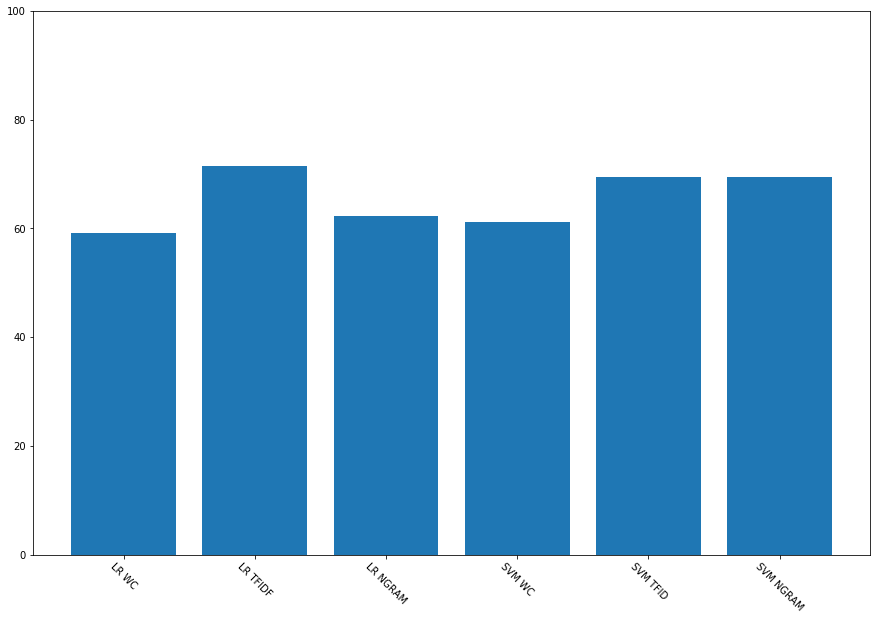

In [45]:
plt.figure(figsize=(15,10))
plt.bar(names, perf)
plt.xticks(rotation=-45)
plt.ylim(0, 100)
plt.show()

## Topic Modelling
### Question 1.

In [134]:
top_words = []
topic_name = []

In [130]:
def display_topics1(H, W, feature_names, documents, no_top_words, no_top_documents,top_words,topic_name):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        topic_name.append([(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))])
        print("\n")
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(documents[doc_index])
            print("\n")
        top_words.append([documents[doc_index]])

In [96]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    for topic_idx, topic in enumerate(H):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\n")
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(documents[doc_index])
            print("\n")

In [70]:
documents = list(X1)[0:10000]
len(documents)

836

In [71]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [72]:
# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

In [73]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [74]:
# Run LDA
lda_model = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
lda_W = lda_model.transform(tf)
lda_H = lda_model.components_

In [75]:
#SVD
lsi_model = TruncatedSVD(n_components=no_topics, n_iter=7, random_state=42).fit(tf)
lsi_W = lsi_model.transform(tf)
lsi_H = lsi_model.components_

In [83]:
no_topics = 5

In [127]:
no_top_words = 10
no_top_documents = 4
print("NMF Topics \n\n")
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)

NMF Topics 


Topic 0:
going know people dont said want like theyre im right


okay great know going bring back job need job need job came one people couple number thank get never end folk going take back country going take back country believe believe came one people said go book real straight book tell know syracuse ive many time many friend happen love basketball team good job right happen excellent coach dont know agree think know he long time he kept good really great thing know hey jim brown great right know jim brown ive always heard better lacrosse player even football player dont know anybodys heard great great great history thank thank thank much everybody thank much little research number manufacturing job cut half syracuse area cut half short period time folk got something bringing job back syracuse lost forty percent manufacturing job since thats china happened join word know world trade organization forget look let china get away going get letting mexico get away company 

In [131]:
no_top_words = 10
no_top_documents = 4
print("LDA Topics \n\n")
display_topics(lda_H, lda_W, tf_feature_names, documents, no_top_words, no_top_documents)

LDA Topics 


Topic 0:
going people know dont said want great country like im


please welcome next president united state mr donald j trump music thank much love la vega love state ever need room nice building right street know hey thank mr mr phil ruffin room great weve got people every room he got restaurant full took long worst thing folk together right movement worst thing start rally there one empty seat press say oh room didnt fill trump outside thousand people trying get hate say like work hard tsa let amend working good im happy put know machine didnt bring enough machine dont know great wayne newton problem performs love wayne ill talk waiting sec careful let say came minute ago even though thousand people outside conference room people closed circuit television whole hotel respect phil youve never anything like owns like three empty seat say otis terrible still piling room think time begin agree agree ok amazing people amazing friend going really well know read there insurge

In [135]:
print("\n\nLSI Topics \n\n")
display_topics1(lsi_H, lsi_W, tf_feature_names, documents, no_top_words, no_top_documents,top_words,topic_name)



LSI Topics 


Topic 0:
going people know dont want country said great like right


music music bomb bursting night top like still oh say starspangled music beautiful sings super well thank much anastasia lee lot people tear eye great talent well anyways yall wanted sit make comfortable want introduce respect much met ten year ago took chance cast show apprentice mother two small child woman entrepreneur took chance said know like woman like shes working mother like shes got passion drive im gon na cast show im glad changed life better knowing mr trump knowing kind person im able tell guy wonderful let tell thing stood first board room immediately saw met knew rare individual gifted presence demeanor stuff came mouth smart man action got see like immediately employee diverse loved respected loved respected dont know guy mean employee know there good day there day maybe theyre like tannaz little bit much mr trump employee say great thing mean realize there ai dont know many apprentice 

### Question 2.

"   Models were built using m-fold cross validation. Data were randomly divided into m subsets denoted as S1, S2, ..., S m . Candidate numbers of topics t1, t2,..., t r were sorted in increasing order. For each number of topics t, an LDA model was built m times on a training set combining m-1 subsets of the entire dataset. The trained LDA model was then utilized to calculate the perplexity on the held-out testing subset. Thus, each subset S i (i∈{1,...,m}) was included in the training set (m-1) times and tested once. The average of perplexities from m testing sets was taken to be perplexity result for each candidate number of topics. Denoting the average perplexities for r candidate number of topics as P1, P2... P r , the rate of perplexity change (RPC) for topic number t i (1<i≤r) was calculated as in the equation below.

RPC(i)=∣∣∣Pi−Pi−1ti−ti−1∣∣∣ "

However, in our case, i just chose a suitable number which is large enough to capture all of the data but small enough to be interpreted easily. Too large a number can lead to over fitting so in my opinion, 5 was a suitable number to choose for the number of topics .

### Question 3

The top topics produced by the algorithm were, "going people know dont said want great country like im", "going know people dont said want like theyre im right" and "going people know dont want country said great like right" produced by the LDA,NMF and SVD algorithms respectively. This seems to fall under the category of "Pride for Country". 

## Visualization

In [61]:
from wordcloud import WordCloud, STOPWORDS

In [62]:
plt.rcParams['font.size']=12                 
plt.rcParams['savefig.dpi']=100             
plt.rcParams['figure.subplot.bottom']=.1


In [63]:
def print_cloud(data):
    wordcloud = WordCloud(
              background_color='white',
              max_words=200,
              max_font_size=40, 
              random_state=42
             ).generate(str(data))
    
    return wordcloud

### Word clouds generated for each of the 5 topics from the SVD model

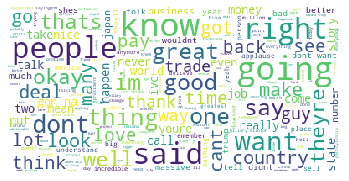

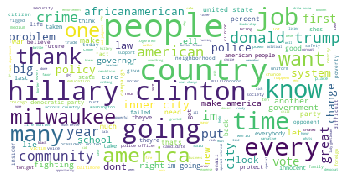

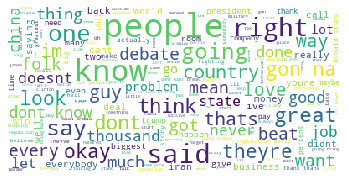

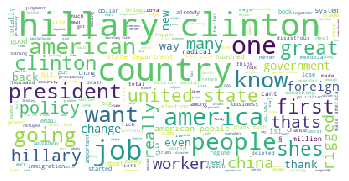

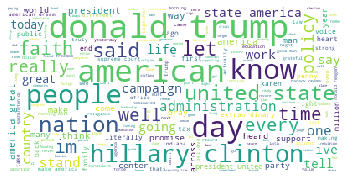

In [136]:
for i in top_words:
    wordcloud = print_cloud(i)
    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    fig.savefig("word1.png", dpi=900)